<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


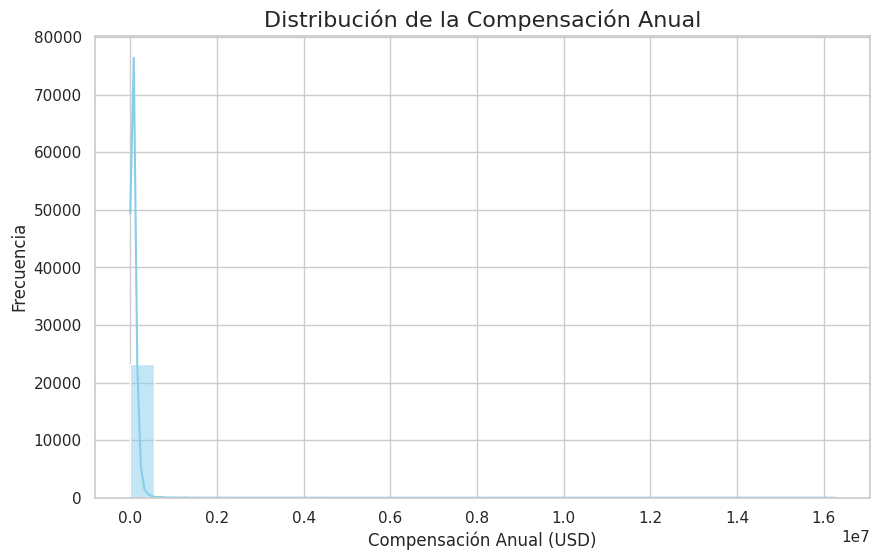

In [7]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un histograma y una gráfica de densidad para la compensación anual
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], kde=True, bins=30, color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución de la Compensación Anual', fontsize=16)
plt.xlabel('Compensación Anual (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()



<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [9]:
# Filtrar los datos para empleados a tiempo completo
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calcular la mediana de la compensación anual
median_compensation = full_time_df['ConvertedCompYearly'].median()

# Mostrar el resultado
print(f"Mediana de la compensación anual para empleados a tiempo completo: ${median_compensation:,.2f}")


Mediana de la compensación anual para empleados a tiempo completo: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [10]:
## Write your code here# Mostrar los valores únicos de la columna ConvertedCompYearly
unique_values = df['ConvertedCompYearly'].dropna().unique()

# Ordenarlos de menor a mayor
unique_values_sorted = sorted(unique_values)

# Mostrar los primeros 20 valores únicos como muestra
print("Valores únicos en ConvertedCompYearly (muestra):")
print(unique_values_sorted[:20])


Valores únicos en ConvertedCompYearly (muestra):
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0)]


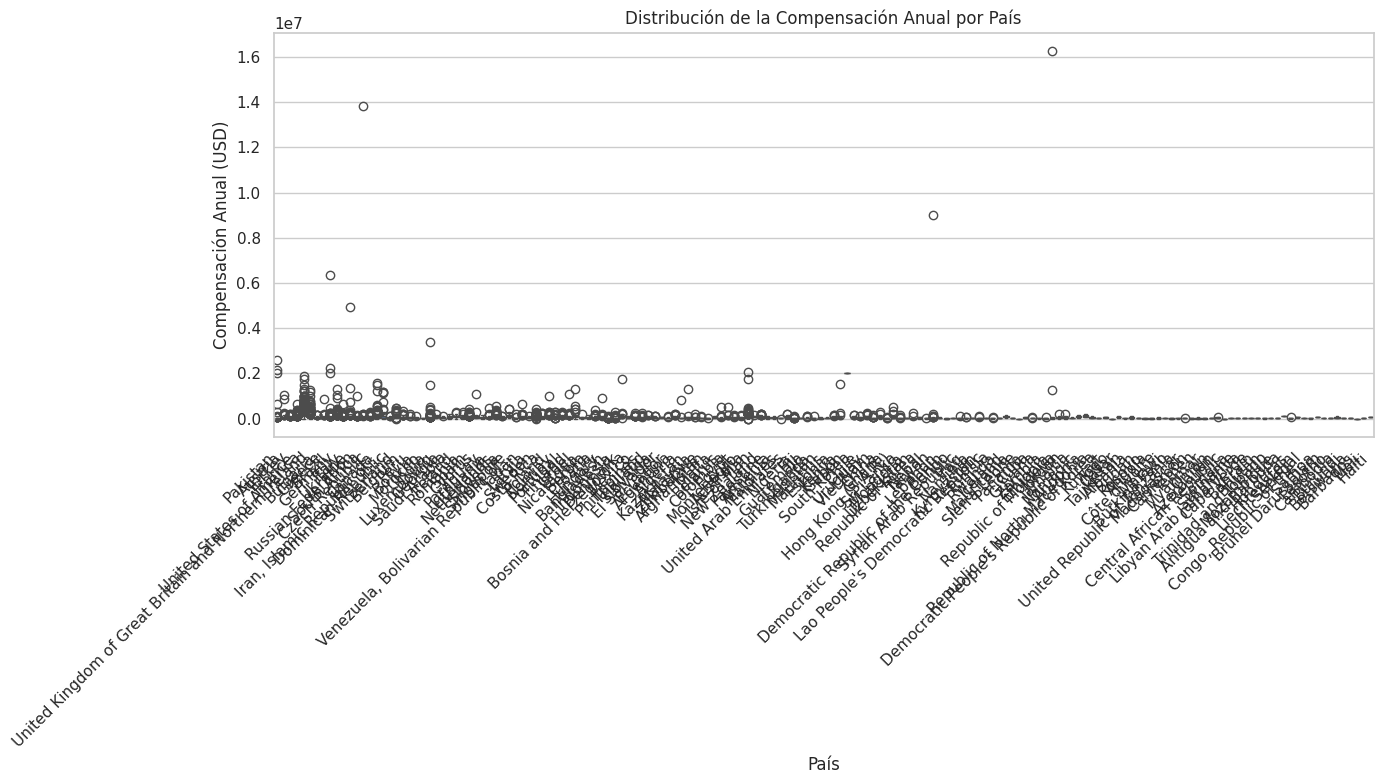

In [11]:
# Filtrar datos válidos (sin nulos en compensación y país)
df_filtered = df[['Country', 'ConvertedCompYearly']].dropna()

# Crear boxplot por país
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de la Compensación Anual por País')
plt.xlabel('País')
plt.ylabel('Compensación Anual (USD)')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [12]:
# Paso 1: Eliminar valores nulos
df_comp = df[['ConvertedCompYearly']].dropna()

# Paso 2: Calcular cuartiles
Q1 = df_comp['ConvertedCompYearly'].quantile(0.25)
Q3 = df_comp['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Paso 3: Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 4: Filtrar el DataFrame
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Resultado
print(f"Número de registros originales: {len(df)}")
print(f"Número de registros sin outliers: {len(df_no_outliers)}")


Número de registros originales: 65437
Número de registros sin outliers: 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [15]:
# Verificar tipos de datos
print(df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dtypes)

# Verificar si hay valores no numéricos o nulos
print(df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].isnull().sum())

# Eliminar filas con valores nulos
df_corr_ready = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Confirmar que todos los valores son numéricos
print(df_corr_ready.applymap(np.isreal).all())


ConvertedCompYearly    float64
WorkExp                float64
JobSatPoints_1         float64
dtype: object
ConvertedCompYearly    42002
WorkExp                35779
JobSatPoints_1         36113
dtype: int64
ConvertedCompYearly    True
WorkExp                True
JobSatPoints_1         True
dtype: bool


/tmp/ipykernel_689/1114410787.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df_corr_ready.applymap(np.isreal).all())


In [14]:
import numpy as np


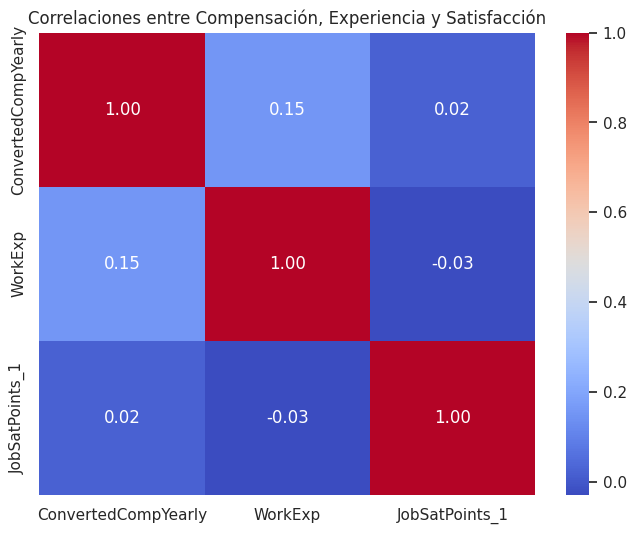

In [16]:
# Crear DataFrame limpio para correlación
df_corr_ready = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Calcular matriz de correlación
correlation_matrix = df_corr_ready.corr()

# Visualizar con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones entre Compensación, Experiencia y Satisfacción')
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


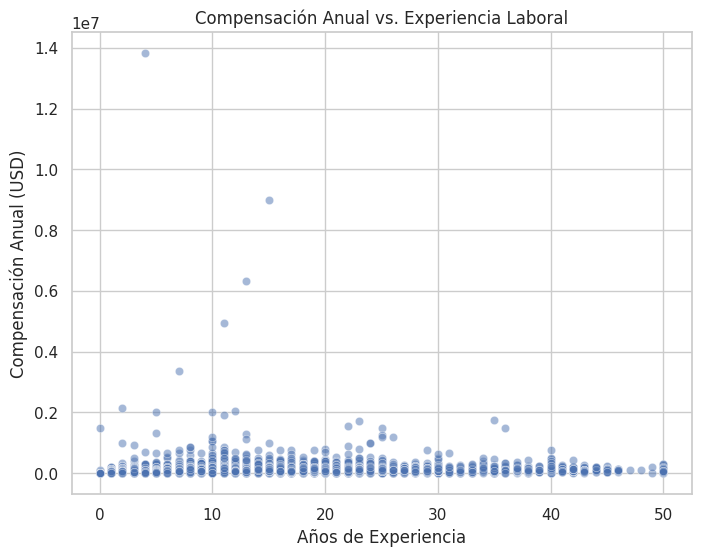

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr_ready, x='WorkExp', y='ConvertedCompYearly', alpha=0.5)
plt.title('Compensación Anual vs. Experiencia Laboral')
plt.xlabel('Años de Experiencia')
plt.ylabel('Compensación Anual (USD)')
plt.grid(True)
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
